In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [22]:
x_train.dtype

dtype('uint8')

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# 标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# one hot
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [25]:
x_train_scaled.mean()

5.1098400794094047e-14

In [26]:
x_train_scaled.std()

0.956316274213992

In [27]:
x_test_scaled.std()

0.9570683370942685

In [28]:
x_train_scaled.shape

(60000, 784)

In [29]:
from tensorflow.keras.layers import Dense, Dropout,AlphaDropout

In [30]:
# 定义网络
model = tf.keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
# dropout单独作为一层
# model.add(Dropout(0.2))
# AlphaDropout: 1. 保持数据的方差和均值不变,即保持数据的分布, 2. 归一化性质不变. 
model.add(AlphaDropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(AlphaDropout(0.2))
# 一般不会在输出层加正则
model.add(Dense(10, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 alpha_dropout (AlphaDropout  (None, 64)               0         
 )                                                               
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 alpha_dropout_1 (AlphaDropo  (None, 64)               0         
 ut)                                                             
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trai

In [32]:
# 配置
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [33]:
# 从训练过程可以观察, 使用了标准化处理的数据, 更快收敛. 
history = model.fit(x_train_scaled, y_train, batch_size=64, epochs=20, validation_data=(x_test_scaled, y_test))

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.6902 - acc: 0.7816 - val_loss: 0.3112 - val_acc: 0.9315
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3521 - acc: 0.8924 - val_loss: 0.2725 - val_acc: 0.9420
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2891 - acc: 0.9110 - val_loss: 0.2351 - val_acc: 0.9482
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2589 - acc: 0.9215 - val_loss: 0.2157 - val_acc: 0.9542
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2317 - acc: 0.9283 - val_loss: 0.2106 - val_acc: 0.9569
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2124 - acc: 0.9350 - val_loss: 0.2033 - val_acc: 0.9612
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2011 - acc: 0.9380 - val_loss: 0.1833 - val_acc: 0.9647
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.

In [34]:
history.history

{'loss': [0.6901848912239075,
  0.35208335518836975,
  0.28910568356513977,
  0.25890642404556274,
  0.23165155947208405,
  0.21238963305950165,
  0.20113904774188995,
  0.19248338043689728,
  0.1815764456987381,
  0.1743607521057129,
  0.17012085020542145,
  0.16390973329544067,
  0.1550132930278778,
  0.1554148942232132,
  0.14841778576374054,
  0.14630192518234253,
  0.1415981501340866,
  0.13741067051887512,
  0.1354503631591797,
  0.1343022584915161],
 'acc': [0.7816333174705505,
  0.8924000263214111,
  0.9110166430473328,
  0.9214500188827515,
  0.9283333420753479,
  0.9349833130836487,
  0.9380000233650208,
  0.9394333362579346,
  0.9436666369438171,
  0.946316659450531,
  0.9470833539962769,
  0.9486666917800903,
  0.9525166749954224,
  0.9516666531562805,
  0.9538666605949402,
  0.95496666431427,
  0.95660001039505,
  0.9574499726295471,
  0.9579166769981384,
  0.9581166505813599],
 'val_loss': [0.3112489879131317,
  0.27251723408699036,
  0.23511074483394623,
  0.215698659420

In [35]:
import pandas as pd

<AxesSubplot:>

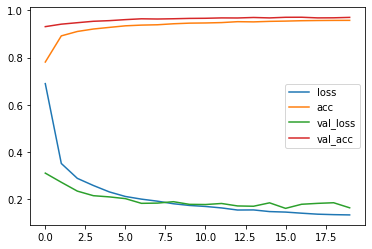

In [36]:
pd.DataFrame(history.history).plot()